### **Anaysis of Crashes during Extreme Weather Conditions**

In [120]:
import requests
import pandas as pd
import io

# Replace with your Dropbox shared link
dropbox_shared_link = "https://www.dropbox.com/scl/fi/xgr72qrz0lx4xh5fyzf38/US_Accidents_March23.csv?rlkey=52rzmamfu8sefomm5o6ha5x3y&dl=0"

# Generate direct link
direct_link = dropbox_shared_link.replace("www.dropbox.com", "dl.dropboxusercontent.com")

# Download the CSV file
response = requests.get(direct_link)

# Load CSV data into a pandas DataFrame
csv_data = response.content

df = pd.DataFrame()
chunk_size = 100000  # Adjust the chunk size according to your system's memory capacity
start_date = pd.to_datetime('2019', format='%Y')
end_date = pd.to_datetime('2023',format = '%Y')
# Iterate over the file in chunks
for chunk in pd.read_csv(io.BytesIO(csv_data), chunksize=chunk_size):
    # Process each chunk of data
    # Perform your desired operations on the chunk here
    # Example: chunk.describe()
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
    df = pd.concat([df,chunk[(chunk['Start_Time'] >= start_date) & (chunk['Start_Time'] <= end_date)]], ignore_index = True)


In [121]:
# Considering Data from the year 2019 to till date.
# The dataset is very large, so it must be loaded as chunks of data so the colab ram does not crash.
# We are loading the data in chunks of 10000
#df = pd.DataFrame()
#chunk_size = 100000  # Adjust the chunk size according to your system's memory capacity
#start_date = pd.to_datetime('2019', format='%Y')
#end_date = pd.to_datetime('2023',format = '%Y')
# Iterate over the file in chunks
#for chunk in pd.read_csv('/content/drive/MyDrive/US_Accidents_March23.csv', chunksize=chunk_size):
    # Process each chunk of data
    # Perform your desired operations on the chunk here
    # Example: chunk.describe()
#    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
#    df = pd.concat([df,chunk[(chunk['Start_Time'] >= start_date) & (chunk['Start_Time'] <= end_date)]], ignore_index = True)


In [122]:
df.shape

(5459425, 46)

In [123]:
df.isna().sum()



ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1848445
End_Lng                  1848445
Distance(mi)                   0
Description                    5
Street                     10093
City                         187
County                         0
State                          0
Zipcode                     1355
Country                        0
Timezone                    5904
Airport_Code               18435
Weather_Timestamp          89930
Temperature(F)            118829
Wind_Chill(F)             286111
Humidity(%)               126518
Pressure(in)              100693
Visibility(mi)            123043
Wind_Direction            142346
Wind_Speed(mph)           182454
Precipitation(in)         411744
Weather_Condition         119201
Amenity                        0
Bump      

In [124]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [125]:
mean_Temperature_by_county = df.groupby('County')['Temperature(F)'].mean()
mean_windchill_by_county = df.groupby('County')['Wind_Chill(F)'].mean()
mean_Humidity_by_county = df.groupby('County')['Humidity(%)'].mean()
mean_Pressure_by_county = df.groupby('County')['Pressure(in)'].mean()
mean_Visibility_by_county = df.groupby('County')['Visibility(mi)'].mean()
mean_Wind_Speed_by_county = df.groupby('County')['Wind_Speed(mph)'].mean()
mean_precipitation_by_county = df.groupby('County')['Precipitation(in)'].mean()
mode_weather_condition_by_county = df.groupby('County')['Weather_Condition'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['Temperature(F)'].fillna(df['County'].map(mean_Temperature_by_county), inplace=True)
df['Wind_Chill(F)'].fillna(df['County'].map(mean_windchill_by_county), inplace=True)
df['Humidity(%)'].fillna(df['County'].map(mean_Humidity_by_county), inplace=True)
df['Pressure(in)'].fillna(df['County'].map(mean_Pressure_by_county), inplace=True)
df['Visibility(mi)'].fillna(df['County'].map(mean_Visibility_by_county), inplace=True)
df['Wind_Speed(mph)'].fillna(df['County'].map(mean_Wind_Speed_by_county), inplace=True)
df['Precipitation(in)'].fillna(df['County'].map(mean_precipitation_by_county), inplace=True)
df['Weather_Condition'].fillna(df['County'].map(mode_weather_condition_by_county), inplace=True)


In [126]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1848445
End_Lng                  1848445
Distance(mi)                   0
Description                    5
Street                     10093
City                         187
County                         0
State                          0
Zipcode                     1355
Country                        0
Timezone                    5904
Airport_Code               18435
Weather_Timestamp          89930
Temperature(F)              1198
Wind_Chill(F)               1201
Humidity(%)                 1198
Pressure(in)                1196
Visibility(mi)              1294
Wind_Direction            142346
Wind_Speed(mph)             1198
Precipitation(in)           3640
Weather_Condition           1208
Amenity                        0
Bump      

In [127]:
mean_Temperature_by_county = df.groupby('State')['Temperature(F)'].mean()
mean_windchill_by_county = df.groupby('State')['Wind_Chill(F)'].mean()
mean_Humidity_by_county = df.groupby('State')['Humidity(%)'].mean()
mean_Pressure_by_county = df.groupby('State')['Pressure(in)'].mean()
mean_Visibility_by_county = df.groupby('State')['Visibility(mi)'].mean()
mean_Wind_Speed_by_county = df.groupby('State')['Wind_Speed(mph)'].mean()
mean_precipitation_by_county = df.groupby('State')['Precipitation(in)'].mean()
mode_weather_condition_by_county = df.groupby('State')['Weather_Condition'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['Temperature(F)'].fillna(df['State'].map(mean_Temperature_by_county), inplace=True)
df['Wind_Chill(F)'].fillna(df['State'].map(mean_windchill_by_county), inplace=True)
df['Humidity(%)'].fillna(df['State'].map(mean_Humidity_by_county), inplace=True)
df['Pressure(in)'].fillna(df['State'].map(mean_Pressure_by_county), inplace=True)
df['Visibility(mi)'].fillna(df['State'].map(mean_Visibility_by_county), inplace=True)
df['Wind_Speed(mph)'].fillna(df['State'].map(mean_Wind_Speed_by_county), inplace=True)
df['Precipitation(in)'].fillna(df['State'].map(mean_precipitation_by_county), inplace=True)
df['Weather_Condition'].fillna(df['State'].map(mode_weather_condition_by_county), inplace=True)

In [128]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1848445
End_Lng                  1848445
Distance(mi)                   0
Description                    5
Street                     10093
City                         187
County                         0
State                          0
Zipcode                     1355
Country                        0
Timezone                    5904
Airport_Code               18435
Weather_Timestamp          89930
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction            142346
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity                        0
Bump      

In [129]:
#df['Temperature(F)'].fillna(inplace=True).mean()
#df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'], inplace=True)
#df['Humidity(%)'].fillna(df['County'].map(mean_Humidity_by_county), inplace=True)
#df['Pressure(in)'].fillna(df['County'].map(mean_Pressure_by_county), inplace=True)
#df['Visibility(mi)'].fillna(df['Visibility(mi)'], inplace=True)
#df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'], inplace=True)
#df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean(),inplace=True)

In [130]:
df = df.drop(['End_Lat','End_Lng'],axis = 1)

In [131]:
df = df.dropna()

#Drop ID, Source, Description

In [132]:
df.isna().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

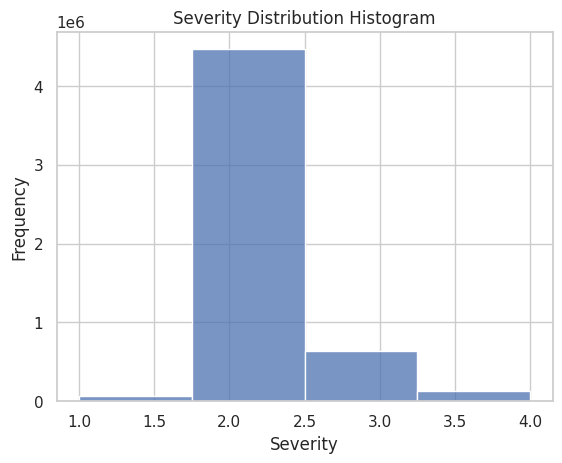

In [133]:
#severity Counts
df['Severity'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Severity', bins=4)  # Adjust the number of bins as needed
plt.title('Severity Distribution Histogram')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()


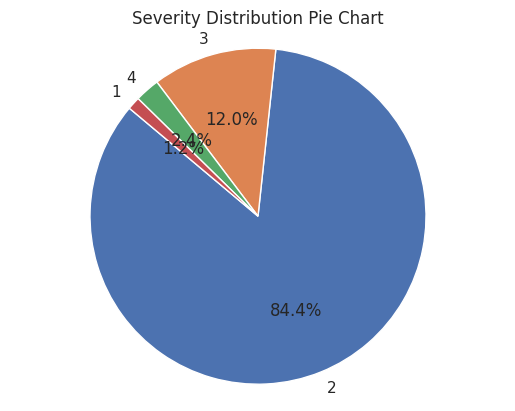

In [134]:
import matplotlib.pyplot as plt

severity_counts = df['Severity'].value_counts()
labels = severity_counts.index
sizes = severity_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Severity Distribution Pie Chart')
plt.show()


In [135]:
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Rain' if 'Rain' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Cloud' if 'Cloudy' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Cloud' if 'Cloud' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Cloud' if 'Overcast' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Rain' if 'Drizzle' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Fair' if 'Clear' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Snow' if 'Snow' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Fog' if 'Fog' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Windy' if 'Windy' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'ThunderStorm' if 'T-Storm' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'ThunderStorm' if 'Thunder' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Hail' if 'Sleet' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Hail' if 'Hail' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Hail' if 'Pellets' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Fog' if 'Haze' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Fog' if 'Dust' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Fog' if 'Smoke' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Fog' if 'Mist' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'ThunderStorm' if 'Tornado' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'ThunderStorm' if 'Sand' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Rain' if 'Showers' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Rain' if 'Squalls' in x else x)
df['Weather_Condition'] = df['Weather_Condition'].apply(lambda x: 'Hail' if 'Wintry' in x else x)



In [136]:
Weather_data = df['Weather_Condition'].value_counts()
len(Weather_data)

9

In [137]:
df = df.drop(df[df['Weather_Condition'] == 'N/A Precipitation'].index)

In [138]:
df = df[(df['Weather_Condition'] != 'Fair') & (df['Weather_Condition'] != 'Cloud')]

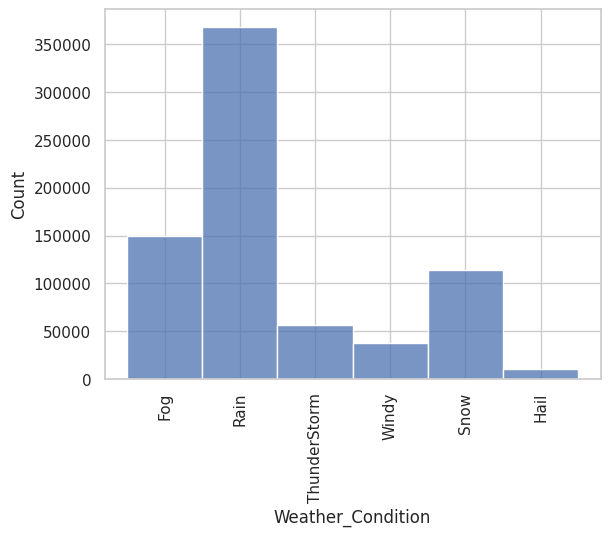

In [139]:
df['Weather_Condition'].value_counts()
sns.histplot(data= df,x = 'Weather_Condition')
plt.xticks(rotation=90)
plt.show()

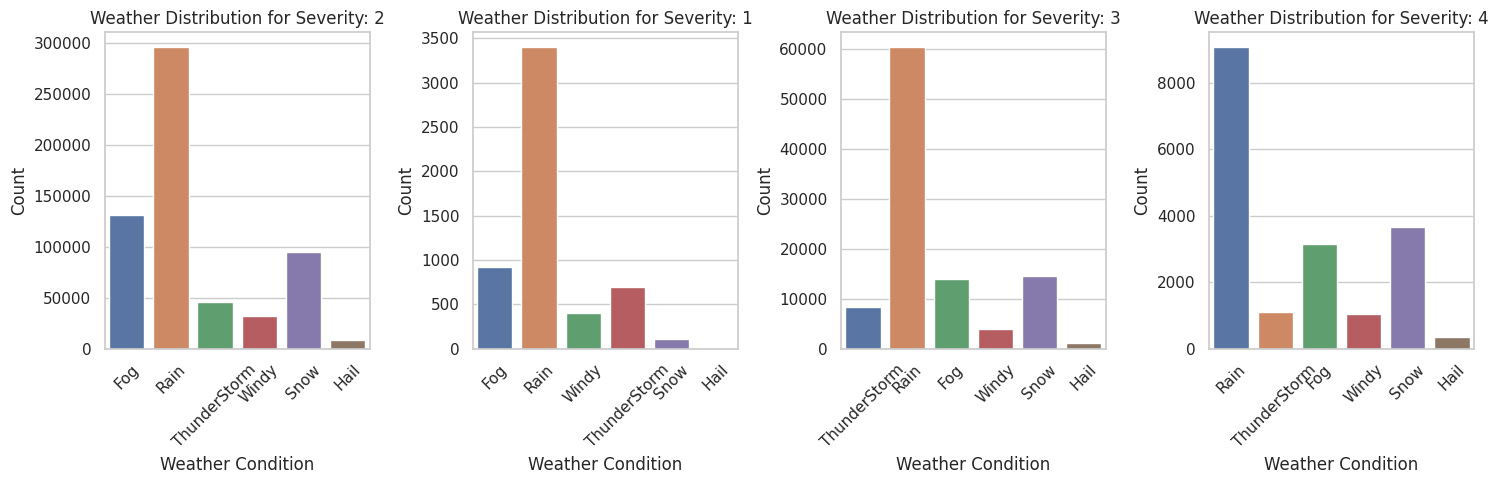

In [140]:
# Create subplots for each severity level
severity_levels = df['Severity'].unique()
num_severity_levels = len(severity_levels)

fig, axes = plt.subplots(1, num_severity_levels, figsize=(15, 5))

for i, severity in enumerate(severity_levels):
    ax = axes[i]
    subset = df[df['Severity'] == severity]
    sns.countplot(data=subset, x='Weather_Condition', ax=ax)
    ax.set_title(f'Weather Distribution for Severity: {severity}')
    ax.set_xlabel('Weather Condition')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

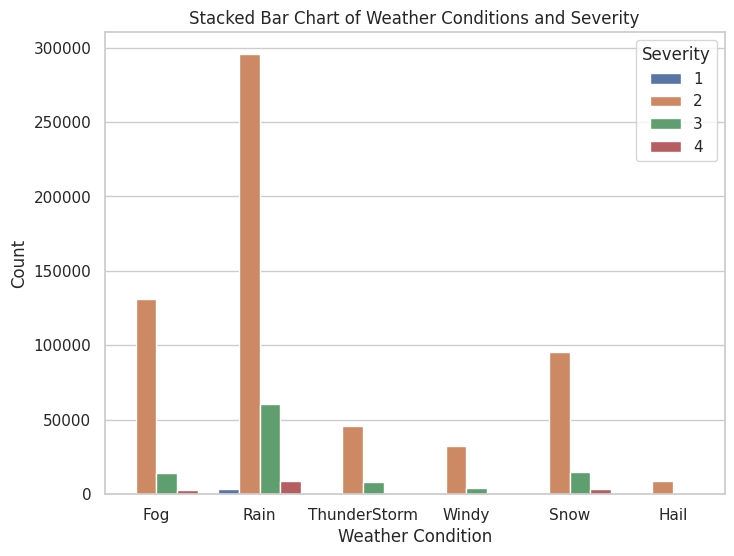

In [141]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weather_Condition', hue='Severity')
plt.title('Stacked Bar Chart of Weather Conditions and Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

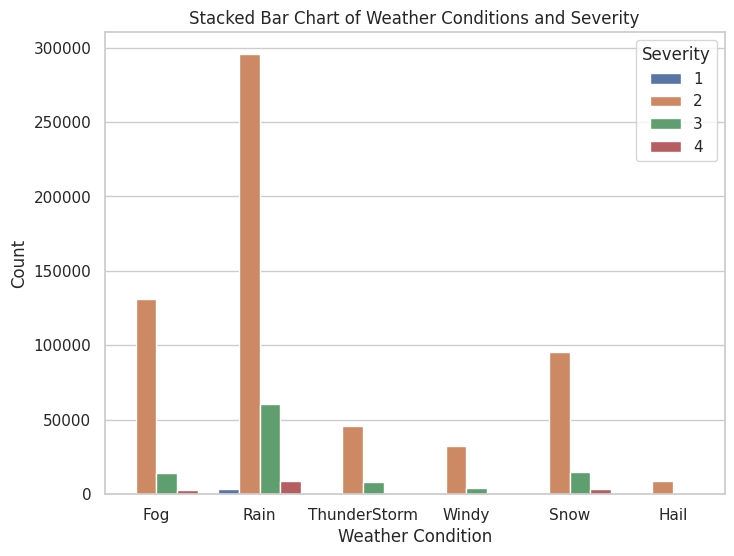

In [142]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weather_Condition', hue='Severity')
plt.title('Stacked Bar Chart of Weather Conditions and Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

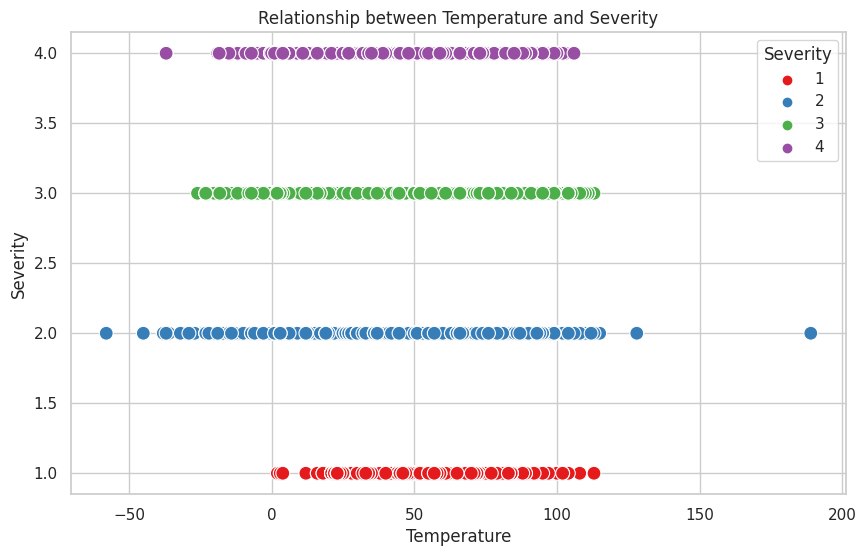

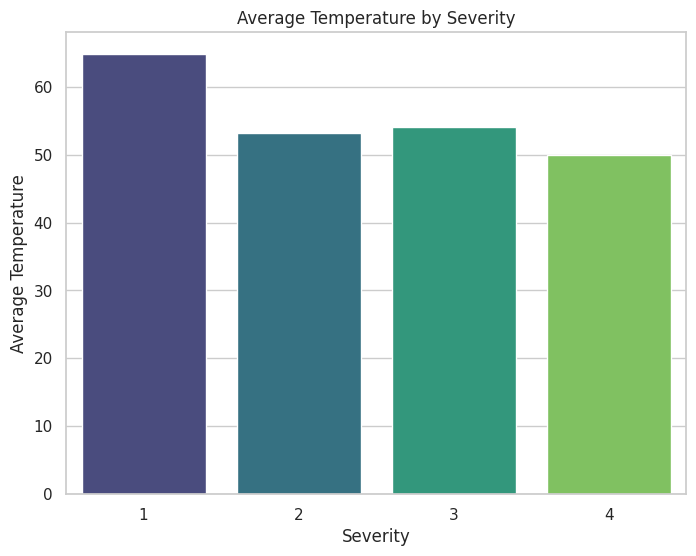

In [143]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature(F)', y='Severity', hue='Severity', palette='Set1', s=100)
plt.title('Relationship between Temperature and Severity')
plt.xlabel('Temperature')
plt.ylabel('Severity')
plt.show()

# Calculate average temperature for each severity level
average_temperature = df.groupby('Severity')['Temperature(F)'].mean().reset_index()

# Create a bar plot to show average temperature for each severity level
plt.figure(figsize=(8, 6))
sns.barplot(data=average_temperature, x='Severity', y='Temperature(F)', palette='viridis')
plt.title('Average Temperature by Severity')
plt.xlabel('Severity')
plt.ylabel('Average Temperature')
plt.show()

In [144]:
#Amenity                        0
#Bump                           0
#Crossing                       0
#Give_Way                       0
#Junction                       0
#No_Exit                        0
#Railway                        0
#Roundabout                     0
#Station                        0
#Stop                           0
#Traffic_Calming                0
#Traffic_Signal                 0
#Turning_Loop                   0
df['Bump'].value_counts()

False    735354
True        251
Name: Bump, dtype: int64

In [145]:
df['Amenity'].value_counts()

False    728535
True       7070
Name: Amenity, dtype: int64

In [146]:
df['Traffic_Calming'].value_counts()

False    735056
True        549
Name: Traffic_Calming, dtype: int64

In [147]:
df['Traffic_Signal'].value_counts()

False    655982
True      79623
Name: Traffic_Signal, dtype: int64

In [148]:
df['Crossing'].value_counts()

False    673051
True      62554
Name: Crossing, dtype: int64

In [149]:
df['Give_Way'].value_counts()

False    732712
True       2893
Name: Give_Way, dtype: int64

In [150]:
df['Junction'].value_counts()

False    680988
True      54617
Name: Junction, dtype: int64

In [151]:
df['No_Exit'].value_counts()

False    734041
True       1564
Name: No_Exit, dtype: int64

In [152]:
df['Railway'].value_counts()

False    730272
True       5333
Name: Railway, dtype: int64

In [153]:
df['Roundabout'].value_counts()

False    735582
True         23
Name: Roundabout, dtype: int64

In [154]:
df['Station'].value_counts()

False    720545
True      15060
Name: Station, dtype: int64

In [155]:
df['Stop'].value_counts()

False    718706
True      16899
Name: Stop, dtype: int64

In [156]:
states = df['State'].value_counts()
top_states = states[:10]

#filtered_df['Severity'].value_counts()
# Severity 1 = Very Mild
# Severity 2 = Mild
# Severity 3 = Moderate
# Severity 4 = Severe


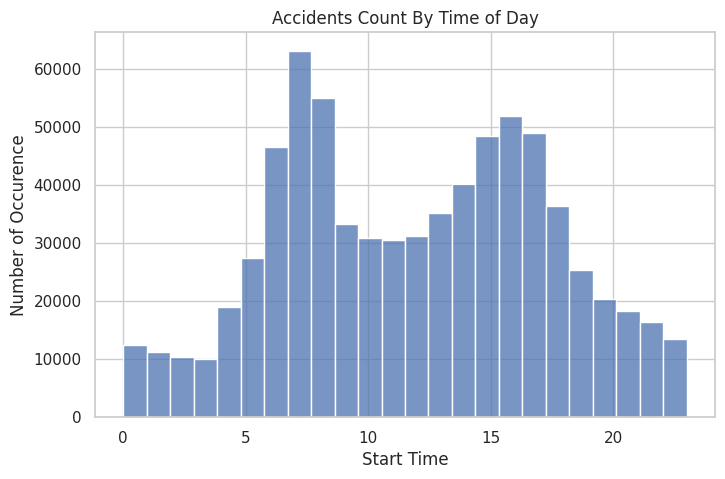

In [157]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

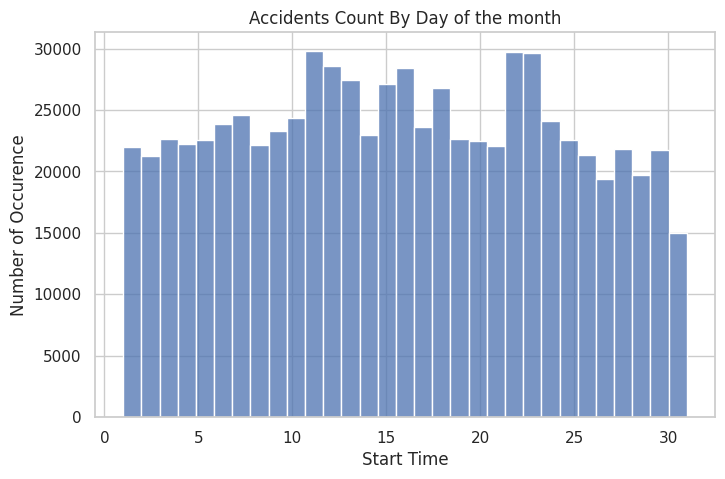

In [158]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.day, bins = 31)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Day of the month')

plt.show()

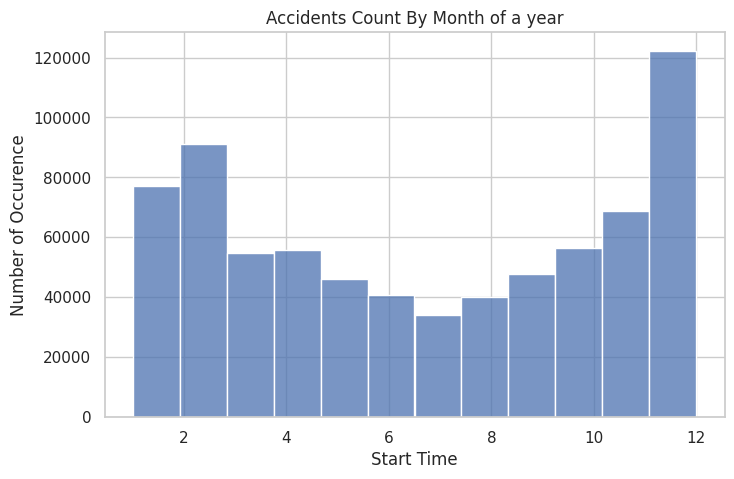

In [159]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.month, bins = 12)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Month of a year')

plt.show()

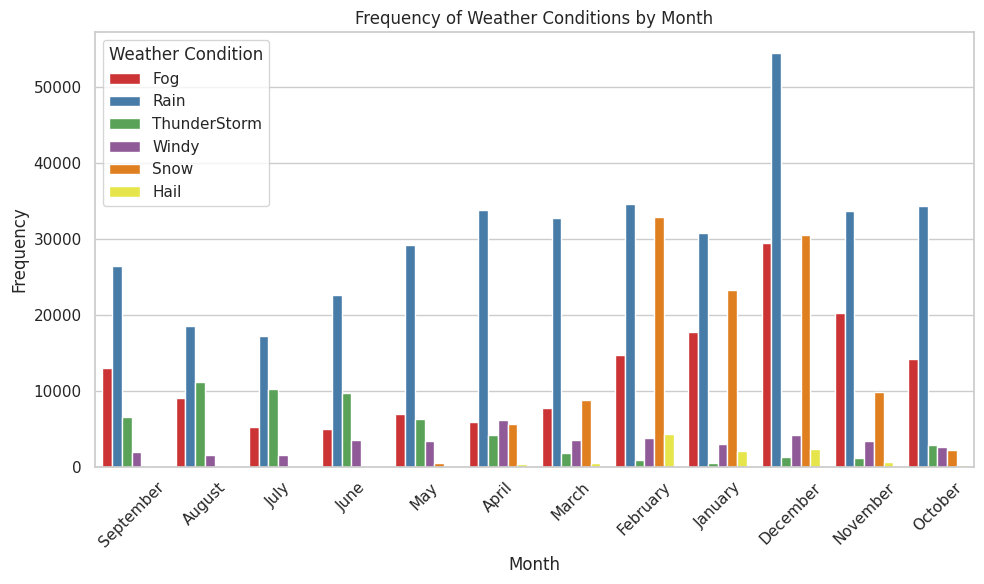

In [160]:
# Extract 'Month' from 'Date'
#df['Month'] = df['Start_Time'].dt.month_name()

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Start_Time'].dt.month_name(), hue=df['Weather_Condition'], palette='Set1')
plt.title('Frequency of Weather Conditions by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Weather Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


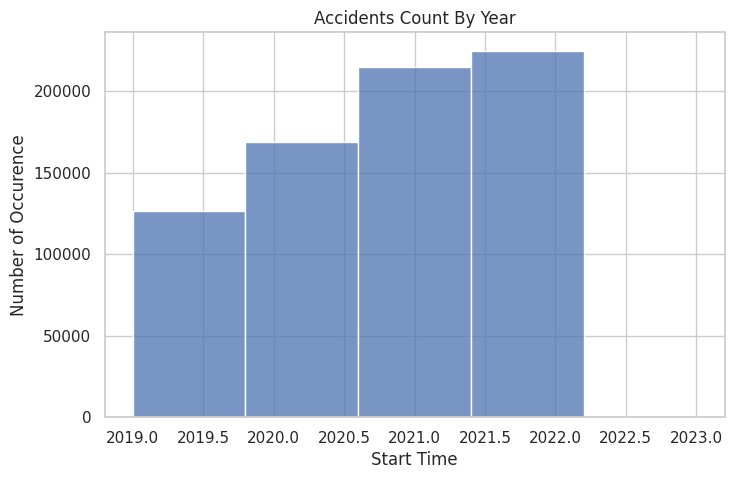

In [161]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df['Start_Time'].dt.year, bins = 5)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Year')

plt.show()

In [162]:
accidents_severity = df.groupby('Severity').count()['ID']
accidents_severity

Severity
1      5531
2    609381
3    102299
4     18394
Name: ID, dtype: int64

In [163]:
import seaborn as sns

In [164]:
df['Weather_Condition'].value_counts()

Rain            368266
Fog             149154
Snow            113592
ThunderStorm     56302
Windy            38023
Hail             10268
Name: Weather_Condition, dtype: int64

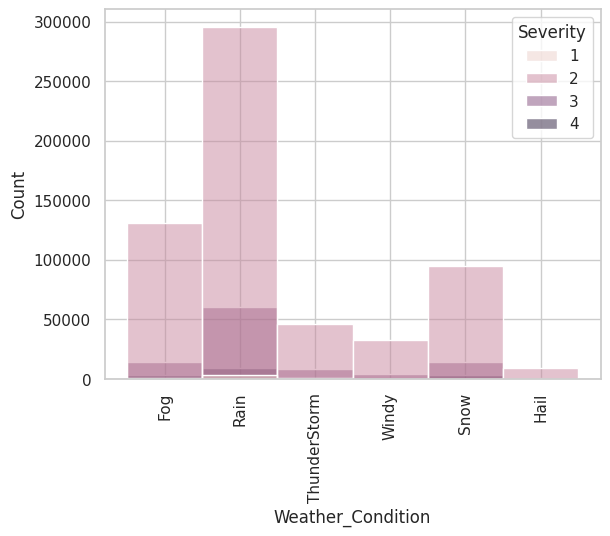

In [165]:
sns.histplot(df,x='Weather_Condition',hue = 'Severity',bins='auto')
plt.xticks(rotation=90)
plt.show()

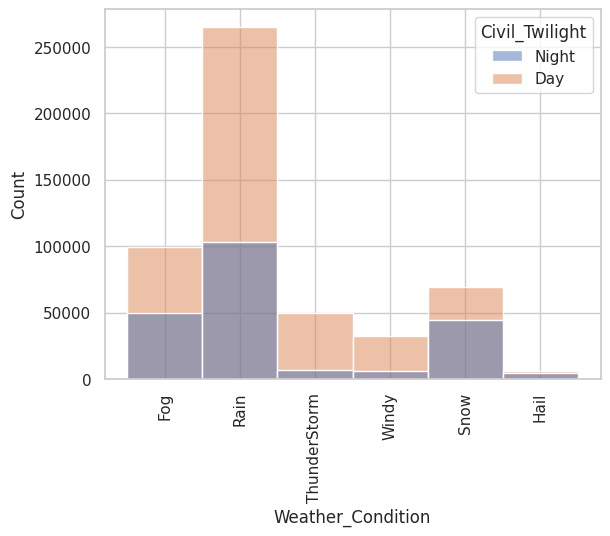

In [166]:
sns.histplot(df,x='Weather_Condition',hue = 'Civil_Twilight',bins='auto')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='State', ylabel='Cases'>

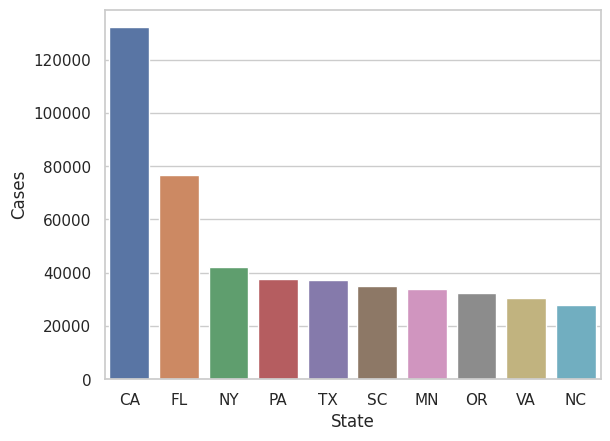

In [167]:
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10))

In [168]:
df['Sunrise_Sunset'].value_counts()

Day      483712
Night    251893
Name: Sunrise_Sunset, dtype: int64

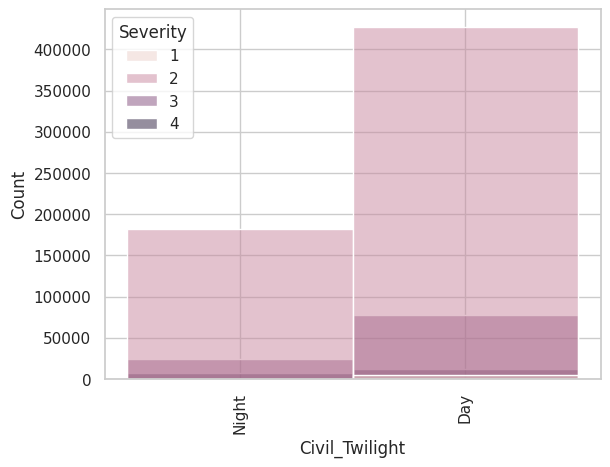

In [169]:
sns.histplot(df,x='Civil_Twilight',hue = 'Severity',bins='auto')
plt.xticks(rotation=90)

plt.show()

In [170]:
df['Civil_Twilight'].value_counts()

Day      521352
Night    214253
Name: Civil_Twilight, dtype: int64

In [171]:
df['Nautical_Twilight'].value_counts()

Day      558456
Night    177149
Name: Nautical_Twilight, dtype: int64

In [172]:
df['Astronomical_Twilight'].value_counts()

Day      588177
Night    147428
Name: Astronomical_Twilight, dtype: int64

In [173]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [174]:
df['Bump'].value_counts()

False    735354
True        251
Name: Bump, dtype: int64

In [175]:
df['Crossing'].value_counts()

False    673051
True      62554
Name: Crossing, dtype: int64

In [176]:
df['Give_Way'].value_counts()

False    732712
True       2893
Name: Give_Way, dtype: int64

In [177]:
df['Junction'].value_counts()

False    680988
True      54617
Name: Junction, dtype: int64

In [178]:
df['No_Exit'].value_counts()

False    734041
True       1564
Name: No_Exit, dtype: int64

In [179]:
df['Railway'].value_counts()

False    730272
True       5333
Name: Railway, dtype: int64

In [180]:
df['Roundabout'].value_counts() #Can remove this

False    735582
True         23
Name: Roundabout, dtype: int64

In [181]:
df['Station'].value_counts()

False    720545
True      15060
Name: Station, dtype: int64

In [182]:
df['Stop'].value_counts()

False    718706
True      16899
Name: Stop, dtype: int64

In [183]:
df['Traffic_Calming'].value_counts()

False    735056
True        549
Name: Traffic_Calming, dtype: int64

In [184]:
df['Traffic_Signal'].value_counts()

False    655982
True      79623
Name: Traffic_Signal, dtype: int64

In [185]:
df['Turning_Loop'].value_counts() # Can remove this

False    735605
Name: Turning_Loop, dtype: int64

Build a model that predicts the severity of a collision with respect to weather conditions

In [186]:
y = pd.DataFrame(df['Severity'])
y.value_counts()

Severity
2           609381
3           102299
4            18394
1             5531
dtype: int64

In [187]:
df['day'] = df['Start_Time'].dt.day
df['hour'] = df['Start_Time'].dt.hour
df['month'] = df['Start_Time'].dt.month

In [188]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,hour,month
64,A-512303,Source2,2,2022-09-08 05:24:30,2022-09-08 06:54:24,33.588982,-80.356400,0.000,Crash on I-95 Southbound at Exit 108 SC-102 Bu...,I-95 N,...,False,False,False,Night,Night,Night,Night,8,5,9
65,A-512304,Source2,1,2022-09-08 06:21:47,2022-09-08 07:36:23,28.057989,-82.293129,0.000,Crash on Main St near Susan Halasz Ln.,Main St,...,False,False,False,Night,Night,Day,Day,8,6,9
67,A-512306,Source2,1,2022-09-08 05:51:31,2022-09-08 06:52:15,41.970291,-71.295868,0.000,Shoulder blocked due to crash on I-95 Northbou...,I-95 S,...,False,False,False,Night,Day,Day,Day,8,5,9
101,A-512344,Source2,1,2022-09-08 04:40:35,2022-09-08 05:10:23,42.135422,-70.975441,0.000,Crash on MA-139 Randolph St at Hancock St.,Randolph St,...,False,False,False,Night,Night,Night,Day,8,4,9
135,A-512382,Source2,2,2022-09-08 12:28:01,2022-09-08 12:57:19,37.288391,-120.456268,0.000,Slow lane blocked due to crash on CA-99 Northb...,CA-99,...,False,False,False,Day,Day,Day,Day,8,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459156,A-7777493,Source1,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,0.493,At FM-1093/Westheimer Rd/Exit 8 - Accident.,I-610 S,...,False,False,False,Day,Day,Day,Day,23,13,8
5459157,A-7777494,Source1,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,0.399,At I-45/Smith St - Accident.,I-10 E,...,False,False,False,Day,Day,Day,Day,23,13,8
5459158,A-7777495,Source1,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,0.520,At Lockwood Dr/Exit 771B - Accident.,US-90 E,...,False,False,False,Day,Day,Day,Day,23,13,8
5459159,A-7777496,Source1,4,2019-08-23 17:01:22,2019-08-23 17:30:03,31.300950,-92.480300,0.121,At LA-28/Monroe St - Accident. Left lane blocked.,N MacArthur Dr,...,False,False,False,Day,Day,Day,Day,23,17,8


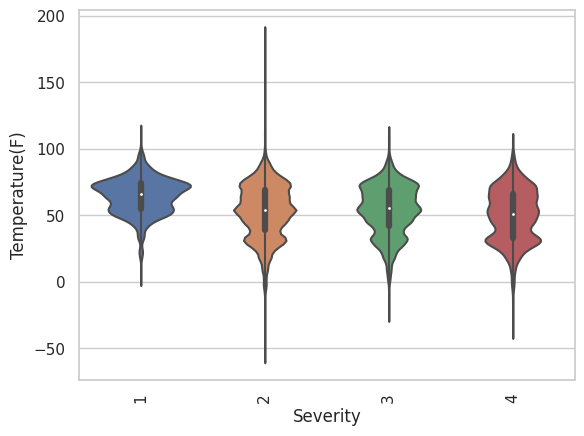

In [189]:
sns.violinplot(df,y = 'Temperature(F)',x = 'Severity')
plt.xticks(rotation=90)
plt.show()

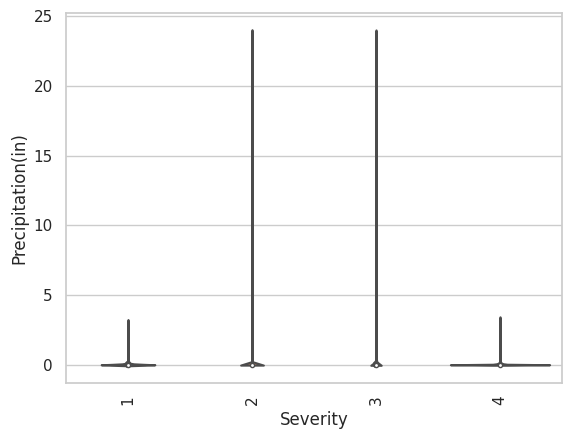

In [190]:
sns.violinplot(df,y = 'Precipitation(in)',x = 'Severity')
plt.xticks(rotation=90)
plt.show()

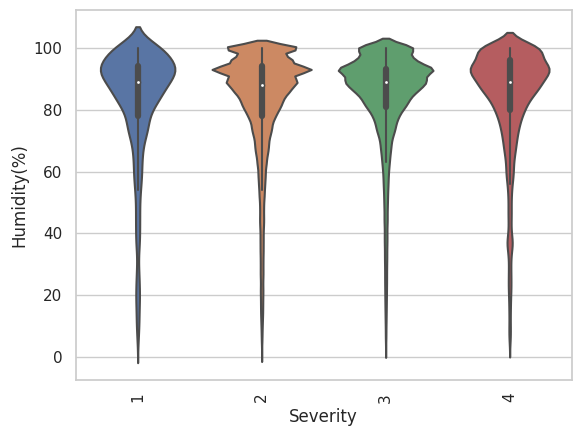

In [191]:
sns.violinplot(df,y = 'Humidity(%)',x = 'Severity')
plt.xticks(rotation=90)
plt.show()

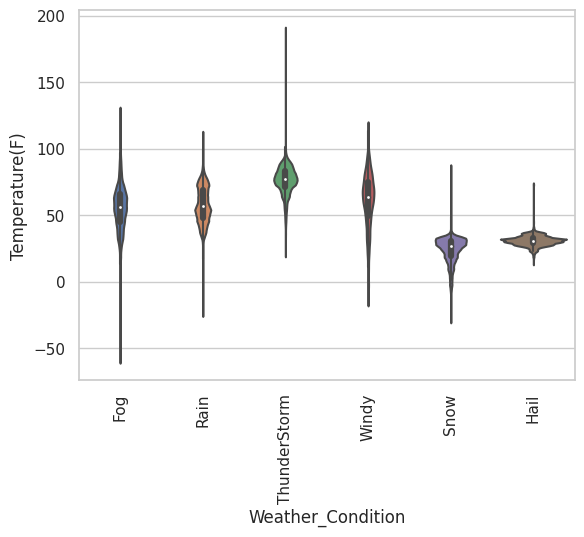

In [192]:
sns.violinplot(df,y = 'Temperature(F)',x = 'Weather_Condition')
plt.xticks(rotation=90)
plt.show()

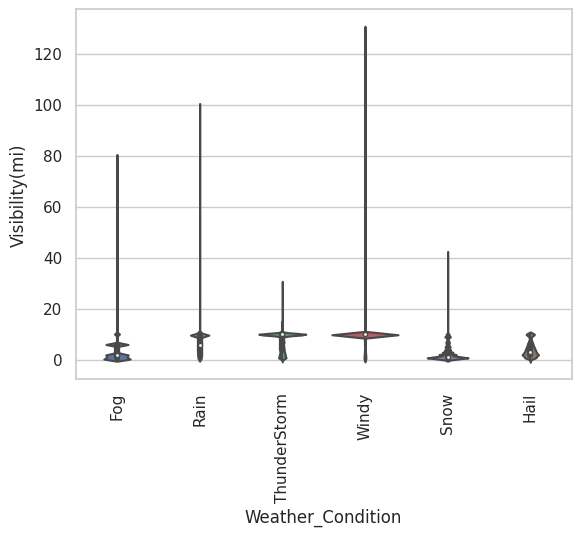

In [193]:
sns.violinplot(df,y = 'Visibility(mi)',x = 'Weather_Condition')
plt.xticks(rotation=90)
plt.show()

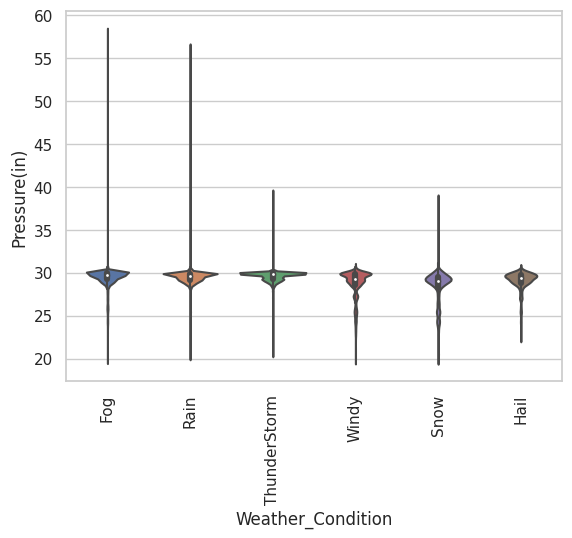

In [194]:
sns.violinplot(df,y = 'Pressure(in)',x = 'Weather_Condition')
plt.xticks(rotation=90)
plt.show()

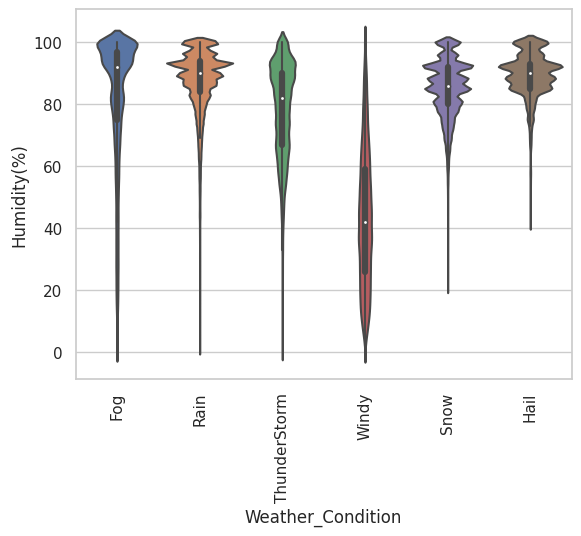

In [195]:
sns.violinplot(df,y = 'Humidity(%)',x = 'Weather_Condition')
plt.xticks(rotation=90)
plt.show()

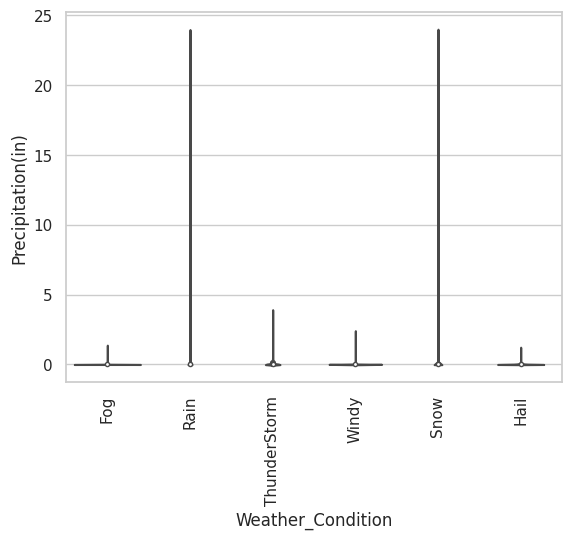

In [196]:
sns.violinplot(df,y = 'Precipitation(in)',x = 'Weather_Condition')
plt.xticks(rotation=90)
plt.show()

In [197]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'day', 'hour', 'month'],
      dtype='object')

In [198]:
df = df.drop(['ID','Source','Start_Time','End_Time','Start_Lat','Start_Lng','Description','Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp'],axis =1)

In [199]:
df

,Severity,Distance(mi),Street,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,hour,month
64,2,0.000,I-95 N,Summerton,Clarendon,SC,68.000000,68.000000,94.00000,29.70,...,False,False,False,Night,Night,Night,Night,8,5,9
65,1,0.000,Main St,Thonotosassa,Hillsborough,FL,72.623152,72.685412,73.04482,29.78,...,False,False,False,Night,Night,Day,Day,8,6,9
67,1,0.000,I-95 S,Attleboro Falls,Bristol,MA,58.000000,58.000000,100.00000,29.49,...,False,False,False,Night,Day,Day,Day,8,5,9
101,1,0.000,Randolph St,Abington,Plymouth,MA,59.000000,59.000000,96.00000,29.91,...,False,False,False,Night,Night,Night,Day,8,4,9
135,2,0.000,CA-99,Merced,Merced,CA,100.000000,100.000000,18.00000,29.56,...,False,False,False,Day,Day,Day,Day,8,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459156,2,0.493,I-610 S,Houston,Harris,TX,76.000000,76.000000,91.00000,29.88,...,False,False,False,Day,Day,Day,Day,23,13,8
5459157,3,0.399,I-10 E,Houston,Harris,TX,76.000000,76.000000,91.00000,29.88,...,False,False,False,Day,Day,Day,Day,23,13,8
5459158,3,0.520,US-90 E,Houston,Harris,TX,76.000000,76.000000,91.00000,29.88,...,False,False,False,Day,Day,Day,Day,23,13,8
5459159,4,0.121,N MacArthur Dr,Alexandria,Rapides,LA,85.000000,85.000000,72.00000,29.82,...,False,False,False,Day,Day,Day,Day,23,17,8


Street Having High traffic and their relationship with weather conditions

In [200]:
Street_data = df['Street'].value_counts()

In [201]:
len(Street_data)

92572

In [202]:
# Example State_data series (replace with your actual data)
State_data = pd.Series(State_data)

# Convert State_data to DataFrame
State_df = State_data.reset_index()
State_df.columns = ['State', 'Value_Count']

print(State_df)

   State  Value_Count
0     CA       132186
1     FL        76583
2     NY        42231
3     PA        37471
4     TX        37222
5     SC        34886
6     MN        33863
7     OR        32300
8     VA        30639
9     NC        27773
10    MI        18841
11    TN        16776
12    NJ        15996
13    IL        15950
14    OH        14354
15    GA        14327
16    LA        13825
17    WA        12023
18    AL        11234
19    CO        10132
20    UT        10042
21    MD         9955
22    MO         9841
23    CT         7797
24    MT         7619
25    MA         6802
26    OK         6715
27    IN         6586
28    AZ         5185
29    WI         4690
30    IA         3928
31    KY         3715
32    AR         3277
33    KS         2907
34    WV         2531
35    NV         1761
36    RI         1752
37    NE         1735
38    MS         1733
39    DE         1516
40    DC         1461
41    NH         1328
42    ID         1230
43    WY          862
44    ND  

In [203]:
#pip install geopandas geoplot matplotlib


In [204]:
#import geopandas as gpd
#import geoplot as gplt

# Load the GeoDataFrame of US states
#us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your data with the US states GeoDataFrame
#merged = us_states.merge(State_df, how='left', left_on='name', right_on='State')

# Plot the heatmap
#fig, ax = plt.subplots(figsize=(12, 8))
#gplt.choropleth(merged, hue=merged['Value_Count'], cmap='YlOrRd', ax=ax)
#plt.title('Crash Heatmap by State')
#plt.show()

In [205]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

State_counts = df.State.value_counts()

display( State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=State_counts.index,
    locationmode="USA-states",
    color=np.log10(State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

CA    132186
FL     76583
NY     42231
PA     37471
TX     37222
SC     34886
MN     33863
OR     32300
VA     30639
NC     27773
MI     18841
TN     16776
NJ     15996
IL     15950
OH     14354
GA     14327
LA     13825
WA     12023
AL     11234
CO     10132
UT     10042
MD      9955
MO      9841
CT      7797
MT      7619
MA      6802
OK      6715
IN      6586
AZ      5185
WI      4690
IA      3928
KY      3715
AR      3277
KS      2907
WV      2531
NV      1761
RI      1752
NE      1735
MS      1733
DE      1516
DC      1461
NH      1328
ID      1230
WY       862
ND       848
NM       712
ME       279
VT       165
SD        21
Name: State, dtype: int64

In [206]:
rain = df[df['Weather_Condition']=='Rain']

rain_State_counts = rain.State.value_counts()

display( rain_State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=rain_State_counts.index,
    locationmode="USA-states",
    color=np.log10(rain_State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

CA    53945
FL    43648
TX    21937
SC    21796
NY    21444
VA    20224
NC    19869
PA    18511
OR    16502
TN    11602
NJ    10573
GA    10062
WA     8064
AL     7613
OH     7352
MI     7181
LA     7169
IL     6776
MD     5680
MN     5381
CT     4784
MO     4678
MA     3952
UT     3358
OK     3092
IN     2898
KY     2655
AZ     2320
AR     1900
WI     1843
CO     1479
WV     1291
RI     1114
MS     1096
KS     1079
DC     1052
DE      891
IA      852
NE      598
NH      554
MT      432
NV      352
ID      205
NM      172
ME      142
VT       67
ND       66
WY        9
SD        6
Name: State, dtype: int64

In [207]:
rain = df[df['Weather_Condition']=='Fog']

rain_State_counts = rain.State.value_counts()

display( rain_State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=rain_State_counts.index,
    locationmode="USA-states",
    color=np.log10(rain_State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

CA    63782
FL     8119
SC     7631
TX     7576
PA     6395
OR     6352
NC     4796
NY     4261
VA     3884
MN     3434
TN     2567
LA     2522
GA     2338
WA     2328
OH     1994
IL     1770
MI     1736
NJ     1693
MD     1533
AL     1455
CT     1281
UT     1089
MA     1039
MT     1021
CO      956
MO      918
IN      839
IA      684
OK      620
WI      576
AZ      447
AR      422
KY      404
ID      385
KS      353
NV      330
WV      265
DE      253
MS      213
RI      199
NE      177
ND      175
DC      157
NH       85
NM       56
ME       22
VT       14
WY        6
SD        2
Name: State, dtype: int64

In [208]:
rain = df[df['Weather_Condition']=='ThunderStorm']

rain_State_counts = rain.State.value_counts()

display( rain_State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=rain_State_counts.index,
    locationmode="USA-states",
    color=np.log10(rain_State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

FL    22026
SC     4224
TX     4081
LA     3451
VA     2208
AL     1939
NC     1892
GA     1668
TN     1471
PA     1182
NY     1116
NJ      969
CA      888
MN      858
MO      791
AZ      741
OK      722
IL      717
OH      566
MI      521
AR      431
CO      427
MS      355
MD      340
CT      330
IN      297
UT      283
KS      270
KY      248
OR      170
WV      150
NE      145
WI      136
MA      122
IA      101
DC       98
DE       75
NM       56
NV       53
RI       44
MT       41
WA       39
NH       23
WY       18
ND        8
ID        7
ME        3
VT        1
Name: State, dtype: int64

In [209]:
rain = df[df['Weather_Condition']=='Snow']

rain_State_counts = rain.State.value_counts()

display( rain_State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=rain_State_counts.index,
    locationmode="USA-states",
    color=np.log10(rain_State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

MN    21148
NY    12084
PA     9426
MI     8688
OR     7010
CO     6030
IL     5579
MT     5314
UT     4482
OH     3829
CA     2888
MO     2625
VA     2384
IN     2116
WI     1780
IA     1751
NJ     1750
MD     1526
WA     1318
MA     1153
CT      887
KS      881
NV      776
TN      773
WV      744
NE      660
WY      575
NC      543
SC      500
ND      495
AZ      490
NH      475
ID      475
TX      467
OK      384
RI      302
KY      272
AR      270
NM      228
ME       88
AL       84
VT       76
DE       75
DC       61
GA       48
LA       35
MS       30
FL        9
SD        8
Name: State, dtype: int64

In [210]:
rain = df[df['Weather_Condition']=='Windy']

rain_State_counts = rain.State.value_counts()

display( rain_State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=rain_State_counts.index,
    locationmode="USA-states",
    color=np.log10(rain_State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

CA    10599
FL     2778
TX     2762
MN     2023
NY     1982
OK     1793
OR     1427
AZ     1185
VA     1148
CO     1104
PA      941
IL      832
UT      685
MT      641
MO      624
SC      621
NJ      606
LA      596
OH      462
MI      440
IA      433
NC      384
MD      352
MA      319
WI      281
CT      268
IN      254
WY      252
NV      238
KS      225
DE      198
NM      197
GA      195
WA      167
TN      162
ID      140
NE      133
AL      118
ND       83
AR       80
DC       79
KY       63
RI       56
NH       30
MS       29
WV       21
ME       10
SD        5
VT        2
Name: State, dtype: int64

In [211]:
rain = df[df['Weather_Condition']=='Hail']

rain_State_counts = rain.State.value_counts()

display( rain_State_counts.sort_values(ascending=False))
fig = px.choropleth(
    locations=rain_State_counts.index,
    locationmode="USA-states",
    color=np.log10(rain_State_counts),
    scope="usa",
    width=1000,
    height=600)

fig.show()

NY    1344
MN    1019
PA    1016
OR     839
VA     791
MD     524
NJ     405
TX     399
NC     289
IL     276
MI     275
CT     247
MA     217
MO     205
TN     201
IN     182
AR     174
MT     170
NH     161
OH     151
UT     145
CO     136
SC     114
WA     107
IA     107
OK     104
KS      99
CA      84
WI      74
KY      73
WV      60
LA      52
RI      37
AL      25
DE      24
NE      22
ND      21
ID      18
GA      16
ME      14
DC      14
NV      12
MS      10
VT       5
FL       3
NM       3
AZ       2
WY       2
Name: State, dtype: int64

In [212]:
df.columns

Index(['Severity', 'Distance(mi)', 'Street', 'City', 'County', 'State',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'day', 'hour', 'month'],
      dtype='object')

Correlation matrix for the dataframe that we are considiering

In [213]:
#remove duplicates
duplicate_rows = df.duplicated()

# Remove the duplicate rows
df = df[~duplicate_rows]

# Reindex the DataFrame
df = df.reset_index(drop=True)

# Print the resulting DataFrame
df

,Severity,Distance(mi),Street,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,hour,month
0,2,0.000,I-95 N,Summerton,Clarendon,SC,68.000000,68.000000,94.00000,29.70,...,False,False,False,Night,Night,Night,Night,8,5,9
1,1,0.000,Main St,Thonotosassa,Hillsborough,FL,72.623152,72.685412,73.04482,29.78,...,False,False,False,Night,Night,Day,Day,8,6,9
2,1,0.000,I-95 S,Attleboro Falls,Bristol,MA,58.000000,58.000000,100.00000,29.49,...,False,False,False,Night,Day,Day,Day,8,5,9
3,1,0.000,Randolph St,Abington,Plymouth,MA,59.000000,59.000000,96.00000,29.91,...,False,False,False,Night,Night,Night,Day,8,4,9
4,2,0.000,CA-99,Merced,Merced,CA,100.000000,100.000000,18.00000,29.56,...,False,False,False,Day,Day,Day,Day,8,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672367,2,0.493,I-610 S,Houston,Harris,TX,76.000000,76.000000,91.00000,29.88,...,False,False,False,Day,Day,Day,Day,23,13,8
672368,3,0.399,I-10 E,Houston,Harris,TX,76.000000,76.000000,91.00000,29.88,...,False,False,False,Day,Day,Day,Day,23,13,8
672369,3,0.520,US-90 E,Houston,Harris,TX,76.000000,76.000000,91.00000,29.88,...,False,False,False,Day,Day,Day,Day,23,13,8
672370,4,0.121,N MacArthur Dr,Alexandria,Rapides,LA,85.000000,85.000000,72.00000,29.82,...,False,False,False,Day,Day,Day,Day,23,17,8


In [214]:
df.describe()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),day,hour,month
count,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000,672372.000000
mean,2.192389,0.806908,53.278556,50.973379,83.348880,29.231023,5.125617,8.830864,0.035932,15.717024,11.865421,6.637076
std,0.470894,2.408800,19.649723,23.298623,17.235283,1.208986,3.655113,7.055981,0.112577,8.559827,5.613638,3.945445
min,1.000000,0.000000,-58.000000,-63.000000,1.000000,19.600000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,39.000000,35.000000,79.000000,29.060000,2.000000,5.000000,0.000000,9.000000,7.000000,3.000000
50%,2.000000,0.077000,55.000000,55.000000,89.000000,29.560000,5.000000,8.000000,0.000000,16.000000,12.000000,7.000000
75%,2.000000,0.769000,69.000000,69.000000,94.000000,29.900000,9.000000,13.000000,0.030000,23.000000,16.000000,11.000000
max,4.000000,251.220001,189.000000,189.000000,100.000000,58.320000,130.000000,984.000000,24.000000,31.000000,23.000000,12.000000


In [215]:
#Label Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Street'] = le.fit_transform(df['Street'])
df['City'] = le.fit_transform(df['City'])
df['County'] = le.fit_transform(df['County'])
df['State'] = le.fit_transform(df['State'])
df['Astronomical_Twilight'] = le.fit_transform(df['Astronomical_Twilight'])
df['Civil_Twilight'] = le.fit_transform(df['Civil_Twilight'])
df['Nautical_Twilight'] = le.fit_transform(df['Nautical_Twilight'])
df['Sunrise_Sunset'] = le.fit_transform(df['Sunrise_Sunset'])
df['Wind_Direction'] = le.fit_transform(df['Wind_Direction'])

df['Bump'] = le.fit_transform(df['Bump'])
df['Crossing'] = le.fit_transform(df['Crossing'])
df['Give_Way'] = le.fit_transform(df['Give_Way'])
df['Junction'] = le.fit_transform(df['Junction'])
df['No_Exit'] = le.fit_transform(df['No_Exit'])
df['Railway'] = le.fit_transform(df['Railway'])
df['Roundabout'] = le.fit_transform(df['Roundabout'])
df['Station'] = le.fit_transform(df['Station'])
df['Stop'] = le.fit_transform(df['Stop'])
df['Traffic_Calming'] = le.fit_transform(df['Traffic_Calming'])
df['Traffic_Signal'] = le.fit_transform(df['Traffic_Signal'])
df['Turning_Loop'] = le.fit_transform(df['Turning_Loop'])
df['Weather_Condition'] = le.fit_transform(df['Weather_Condition'])


<Axes: >

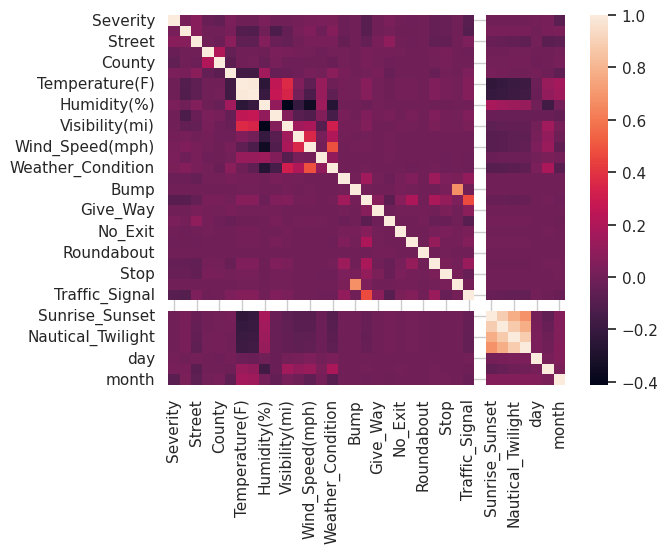

In [216]:
sns.heatmap(df.corr())

In [217]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
df = df.drop(columns=correlated_features)

In [218]:
df.columns

Index(['Severity', 'Distance(mi)', 'Street', 'City', 'County', 'State',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'day',
       'hour', 'month'],
      dtype='object')

In [219]:
#remove duplicates
duplicate_rows = df.duplicated()

# Remove the duplicate rows
df = df[~duplicate_rows]

# Reindex the DataFrame
df = df.reset_index(drop=True)

# Print the resulting DataFrame
df

,Severity,Distance(mi),Street,City,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,hour,month
0,2,0.000,61903,7650,278,38,68.000000,94.00000,29.70,2.00,...,0,0,0,1,1,1,1,8,5,9
1,1,0.000,65900,7827,616,8,72.623152,73.04482,29.78,4.00,...,0,0,0,1,1,0,0,8,6,9
2,1,0.000,61904,301,158,17,58.000000,100.00000,29.49,0.25,...,0,0,0,1,0,0,0,8,5,9
3,1,0.000,76393,9,1060,17,59.000000,96.00000,29.91,1.00,...,0,0,0,1,1,1,0,8,4,9
4,2,0.000,47565,4957,867,3,100.000000,18.00000,29.56,3.00,...,0,0,0,0,0,0,0,8,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672367,2,0.493,61662,3632,588,41,76.000000,91.00000,29.88,1.00,...,0,0,0,0,0,0,0,23,13,8
672368,3,0.399,61188,3632,588,41,76.000000,91.00000,29.88,0.50,...,0,0,0,0,0,0,0,23,13,8
672369,3,0.520,87347,3632,588,41,76.000000,91.00000,29.88,0.50,...,0,0,0,0,0,0,0,23,13,8
672370,4,0.121,69712,80,1110,16,85.000000,72.00000,29.82,10.00,...,0,0,0,0,0,0,0,23,17,8


By Viewing the Correlation matrix above

1.Roundabout and Turning Loop are not dependent on any of the things so we can remove them.

2.In Columns Temperature and WindChill almost have highest dependency So, we couls only use any one. In this case we use Temperature.

In [220]:
daf = df.drop(['Turning_Loop','Street','City','County','Wind_Direction','State','day','hour','month','Sunrise_Sunset','Nautical_Twilight','Astronomical_Twilight'],axis = 1)

<Axes: >

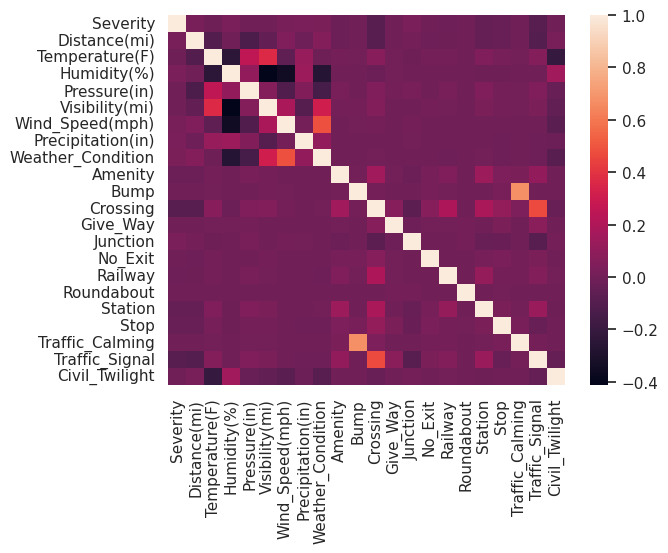

In [221]:
sns.heatmap(daf.corr())

In [222]:
# Calculate the correlation matrix
correlation_matrix = daf.corr()

# Find correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
daf = daf.drop(columns=correlated_features)

In [223]:
#remove duplicates
duplicate_rows = daf.duplicated()

# Remove the duplicate rows
daf = daf[~duplicate_rows]

# Reindex the DataFrame
daf = daf.reset_index(drop=True)

# Print the resulting DataFrame
daf.shape

(636238, 22)

In [224]:
y = daf['Severity']
daf = daf.drop(['Severity'],axis = 1)

In [225]:
X = daf

In [226]:
#Random Under Sampler to train on the data having equal no. of values

from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

In [227]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [228]:
X_train.shape

(14883, 21)

In [229]:
y_train.value_counts()

4    3742
1    3734
3    3704
2    3703
Name: Severity, dtype: int64

In [230]:
#MachineLearning Code

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfe = RandomForestClassifier(random_state=100)

rfe.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

Accuracy: 0.5812953507121742
              precision    recall  f1-score   support

           1       0.62      0.71      0.66       917
           2       0.52      0.32      0.40       948
           3       0.61      0.58      0.60       947
           4       0.56      0.72      0.63       909

    accuracy                           0.58      3721
   macro avg       0.58      0.58      0.57      3721
weighted avg       0.58      0.58      0.57      3721



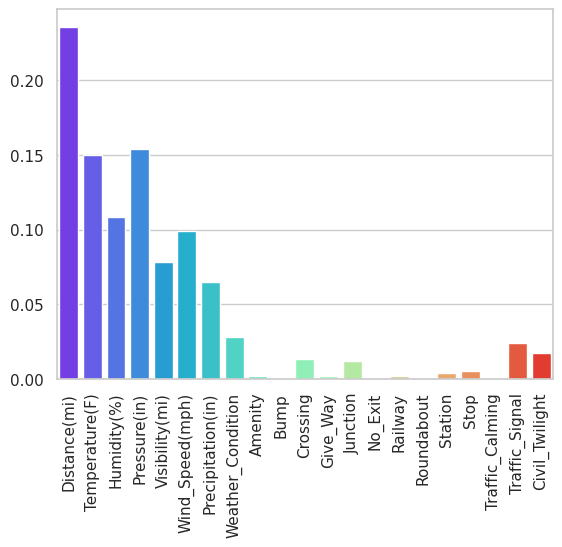

In [231]:
rfe_pred = rfe.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, rfe_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, rfe_pred))
feature_importance = rfe.feature_importances_

sns.barplot(x=X_train.columns,y=feature_importance,palette ='rainbow')
plt.xticks(rotation=90)
plt.show()

In [232]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

# Fit the Classifier to the training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [233]:
# Predict the labels of the test data
y_pred = dtree.predict(X_test)

#from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.48669712442891694
              precision    recall  f1-score   support

           1       0.55      0.60      0.57       917
           2       0.39      0.34      0.36       948
           3       0.49      0.48      0.48       947
           4       0.51      0.53      0.52       909

    accuracy                           0.49      3721
   macro avg       0.48      0.49      0.48      3721
weighted avg       0.48      0.49      0.48      3721



In [234]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
clf = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the training data
clf.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=10)

In [235]:
# Predict the labels of the test data
y_pred = clf.predict(X_test)

#from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.3813490997043805
              precision    recall  f1-score   support

           1       0.42      0.65      0.51       917
           2       0.32      0.28      0.30       948
           3       0.34      0.29      0.31       947
           4       0.44      0.31      0.36       909

    accuracy                           0.38      3721
   macro avg       0.38      0.38      0.37      3721
weighted avg       0.38      0.38      0.37      3721



In [236]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Accuracy: 0.808767131899912
              precision    recall  f1-score   support

           1       0.04      0.01      0.01       893
           2       0.85      0.94      0.89    104385
           3       0.46      0.26      0.34     18701
           4       0.14      0.05      0.08      3269

    accuracy                           0.81    127248
   macro avg       0.37      0.31      0.33    127248
weighted avg       0.77      0.81      0.78    127248



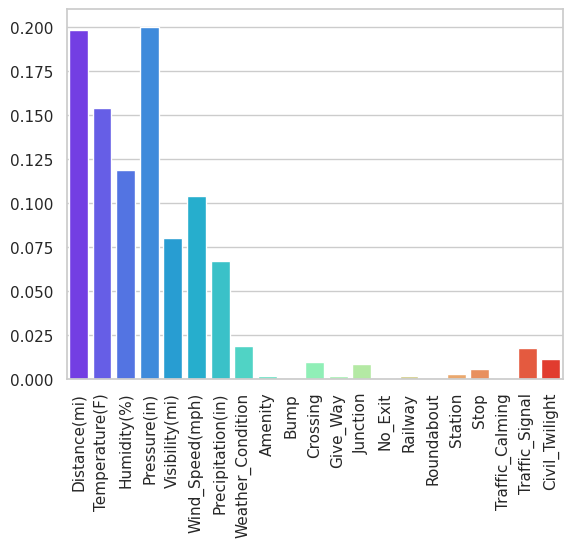

In [237]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfe = RandomForestClassifier(random_state=100)

rfe.fit(X_train,y_train)

rfe_pred = rfe.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, rfe_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, rfe_pred))
feature_importance = rfe.feature_importances_

sns.barplot(x=X_train.columns,y=feature_importance,palette ='rainbow')
plt.xticks(rotation=90)
plt.show()

In [238]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

# Fit the Classifier to the training data
dtree.fit(X_train,y_train)

# Predict the labels of the test data
y_pred = dtree.predict(X_test)

#from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.7447504086508235
              precision    recall  f1-score   support

           1       0.05      0.07      0.06       893
           2       0.85      0.84      0.85    104385
           3       0.33      0.34      0.34     18701
           4       0.09      0.10      0.09      3269

    accuracy                           0.74    127248
   macro avg       0.33      0.34      0.33    127248
weighted avg       0.75      0.74      0.75    127248



In [239]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier object
clf = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the training data
clf.fit(X_train,y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

#from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.8160914120457688
              precision    recall  f1-score   support

           1       0.12      0.00      0.00       893
           2       0.82      0.99      0.90    104385
           3       0.33      0.03      0.06     18701
           4       0.53      0.02      0.03      3269

    accuracy                           0.82    127248
   macro avg       0.45      0.26      0.25    127248
weighted avg       0.74      0.82      0.75    127248

